## Importando as bibliotecas e pacotes

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
# from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

## Carregando o dataset

In [89]:
path = "https://raw.githubusercontent.com/matheusssilva991/hackaton-cepedi/main/data/dados_consumo_agua.csv"
df_dados_agua = pd.read_csv(path, sep = ",")

## Breve resumo do dataset

In [90]:
df_dados_agua.head()

,ano,mes,dia_semana,dia_mes,hora,quantidade_pessoas,consumo_agua_m3,regiao,padrao_consumo
0,2020,1,quarta,1,0,3,0.13,Sul,Normal
1,2020,1,quarta,1,1,3,0.21,Sul,Normal
2,2020,1,quarta,1,2,3,0.26,Sul,Normal
3,2020,1,quarta,1,3,3,0.15,Sul,Normal
4,2020,1,quarta,1,4,3,0.62,Sul,Alto


In [91]:
df_dados_agua.dtypes

ano                     int64
mes                     int64
dia_semana             object
dia_mes                 int64
hora                    int64
quantidade_pessoas      int64
consumo_agua_m3       float64
regiao                 object
padrao_consumo         object
dtype: object

In [92]:
df_dados_agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano                 35040 non-null  int64  
 1   mes                 35040 non-null  int64  
 2   dia_semana          35040 non-null  object 
 3   dia_mes             35040 non-null  int64  
 4   hora                35040 non-null  int64  
 5   quantidade_pessoas  35040 non-null  int64  
 6   consumo_agua_m3     35040 non-null  float64
 7   regiao              35040 non-null  object 
 8   padrao_consumo      35040 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 2.4+ MB


## Modificando tipos dos dados do dataset

### Diminuindo o peso dos dados

In [93]:
df_dados_agua["ano"] = df_dados_agua["ano"].astype("uint16")
df_dados_agua["mes"] = df_dados_agua["mes"].astype("uint8")

### Modificando a coluna *"dia_semana"* para manter os dados de forma numérica

#### Verificando os valores únicos

In [94]:
df_dados_agua["dia_semana"].unique()

array(['quarta', 'quinta', 'sexta', 'sábado', 'domingo', 'segunda',
       'terça'], dtype=object)

#### Mapeando os novos valores de "dia_semana"

In [95]:
dicionario_dia_semana = {
    "domingo"   : 0,
    "segunda"   : 1,
    "terça"     : 2,
    "quarta"    : 3,
    "quinta"    : 4,
    "sexta"     : 5,
    "sábado"    : 6
}

df_dados_agua["dia_semana"] = df_dados_agua["dia_semana"].map(dicionario_dia_semana)
df_dados_agua["dia_semana"] = df_dados_agua["dia_semana"].astype("uint8")

### Modificando as outras colunas do dataset

In [96]:
# dropando coluna "dia_mes" por redundancia
df_dados_agua.drop(columns = ["dia_mes"], axis = "columns", inplace = True)

df_dados_agua["hora"] = df_dados_agua["hora"].astype("uint8")
df_dados_agua["quantidade_pessoas"] = df_dados_agua["quantidade_pessoas"].astype("uint8")
df_dados_agua["consumo_agua_m3"] = df_dados_agua["consumo_agua_m3"].astype("float32")

### Modificando as colunas *"regiao"* e *"padrao_consumo"* para manter os dados de forma numérica

#### Verificando os valores únicos

In [97]:
print(f"Valores únicos da coluna ---regiao--- : {df_dados_agua.regiao.unique()} \n")
print(f"Valores únicos da coluna ---padrao_consumo--- : {df_dados_agua.padrao_consumo.unique()}")

Valores únicos da coluna ---regiao--- : ['Sul'] 

Valores únicos da coluna ---padrao_consumo--- : ['Normal' 'Alto']


#### Mapeando os novos valores de *"padrao_consumo"* e excluindo a coluna *"regiao"*

In [98]:
# dropando coluna "regiao" por possuir um unico valor
df_dados_agua.drop(columns = ["regiao"], axis = "columns", inplace = True)

dicionario_padrao_consumo = {
    "Normal" : 0,
    "Alto" : 1
}

df_dados_agua["padrao_consumo"] = df_dados_agua["padrao_consumo"].map(dicionario_padrao_consumo)
df_dados_agua["padrao_consumo"] = df_dados_agua["padrao_consumo"].astype("uint8")

### Como ficaram os dados:

In [100]:
df_dados_agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano                 35040 non-null  uint16 
 1   mes                 35040 non-null  uint8  
 2   dia_semana          35040 non-null  uint8  
 3   hora                35040 non-null  uint8  
 4   quantidade_pessoas  35040 non-null  uint8  
 5   consumo_agua_m3     35040 non-null  float32
 6   padrao_consumo      35040 non-null  uint8  
dtypes: float32(1), uint16(1), uint8(5)
memory usage: 376.5 KB


## EDA

### Valor máximo, Valor mínimo, Média, Mediana, Desvio padrão

In [103]:
print("Valores máximos:\n")
for column in df_dados_agua.columns:
    print(f"Coluna {column}: {df_dados_agua[column].max()}")
    
print("\n\nValores mínimos:\n")
for column in df_dados_agua.columns:
    print(f"Coluna {column}: {df_dados_agua[column].min()}")
    
print("\n\nMédia dos valores:\n")
for column in df_dados_agua.columns:
    print(f"Coluna {column}: {df_dados_agua[column].mean()}")
    
print("\n\nMediana dos valores:\n")
for column in df_dados_agua.columns:
    print(f"Coluna {column}: {df_dados_agua[column].median()}")
    
print("\n\nDesvio padrão dos valores:\n")
for column in df_dados_agua.columns:
    print(f"Coluna {column}: {df_dados_agua[column].std()}")

Valores máximos:

Coluna ano: 2023
Coluna mes: 12
Coluna dia_semana: 6
Coluna hora: 23
Coluna quantidade_pessoas: 3
Coluna consumo_agua_m3: 4.110000133514404
Coluna padrao_consumo: 1


Valores mínimos:

Coluna ano: 2020
Coluna mes: 1
Coluna dia_semana: 0
Coluna hora: 0
Coluna quantidade_pessoas: 3
Coluna consumo_agua_m3: 0.029999999329447746
Coluna padrao_consumo: 0


Média dos valores:

Coluna ano: 2021.4979452054795
Coluna mes: 6.519178082191781
Coluna dia_semana: 3.004109589041096
Coluna hora: 11.5
Coluna quantidade_pessoas: 3.0
Coluna consumo_agua_m3: 0.9206660985946655
Coluna padrao_consumo: 0.20345319634703196


Mediana dos valores:

Coluna ano: 2021.0
Coluna mes: 7.0
Coluna dia_semana: 3.0
Coluna hora: 11.5
Coluna quantidade_pessoas: 3.0
Coluna consumo_agua_m3: 0.7400000095367432
Coluna padrao_consumo: 0.0


Desvio padrão dos valores:

Coluna ano: 1.118048054527653
Coluna mes: 3.446952006303335
Coluna dia_semana: 1.999681816488795
Coluna hora: 6.922285330039023
Coluna quantidade

### Correlação entre as colunas

In [101]:
df_correlacao = df_dados_agua.corr()
df_correlacao

,ano,mes,dia_semana,hora,quantidade_pessoas,consumo_agua_m3,padrao_consumo
ano,1.000000e+00,-2.563713e-04,-3.025872e-04,-1.274094e-15,NaN,-0.005301,-0.012482
mes,-2.563713e-04,1.000000e+00,6.348364e-03,-1.478608e-16,NaN,-0.011341,0.002176
dia_semana,-3.025872e-04,6.348364e-03,1.000000e+00,6.152865e-18,NaN,0.004639,0.005130
hora,-1.274094e-15,-1.478608e-16,6.152865e-18,1.000000e+00,NaN,0.086083,0.005566
quantidade_pessoas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumo_agua_m3,-5.301279e-03,-1.134053e-02,4.638501e-03,8.608331e-02,NaN,1.000000,0.587553
padrao_consumo,-1.248194e-02,2.175556e-03,5.130032e-03,5.566142e-03,NaN,0.587553,1.000000


### Matriz de correlação - Heatmap

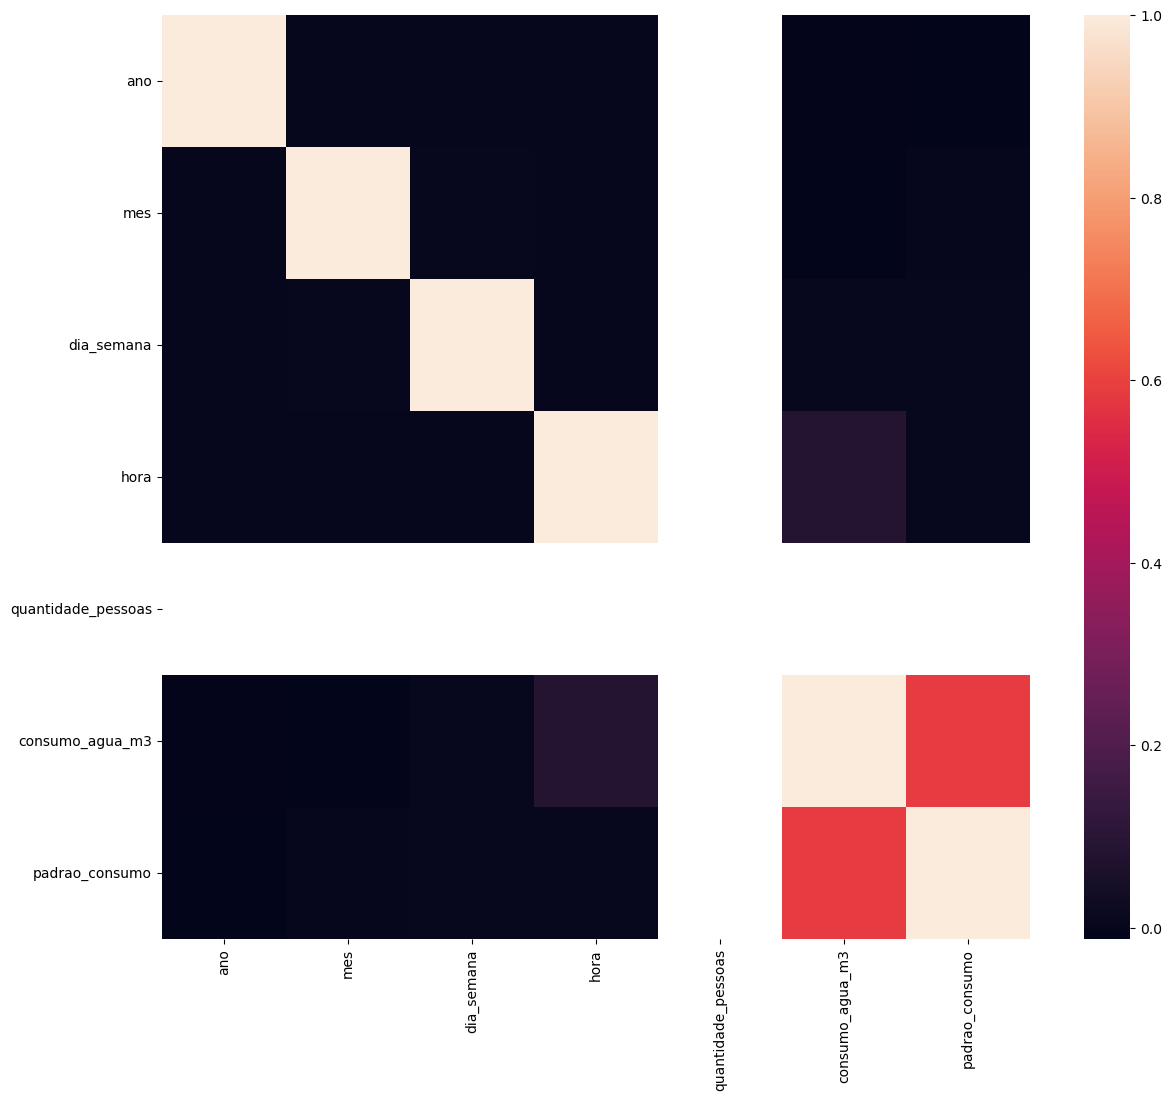

In [102]:
figure = plt.figure(figsize = (14, 12))
sns.heatmap(data = df_correlacao)
plt.show()

## Separando as features do target

In [ ]:
X = df_dados_agua.values
y = df_dados_agua.values.reshape(-1, 1)

## Divisão treino-teste

In [ ]:
tamanho_corte = 0.4
semente = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = tamanho_corte, random_state = semente)

## RandomForestClassifier

In [ ]:
modelo_random_forest = RandomForestClassifier()

In [ ]:
dicionario_random_forest = {
    n_estimators                : np.arange(10, 110, 10),# de 10 a 100
    criterion                   : ["gini", "entropy", "log_loss"],
    max_depth                   : np.arange(2, 8, 1),# de 2 a 7
    min_samples_split           : np.arange(2, 11, 1),# de 2 a 10
    min_samples_leaf            : np.arange(1, 6, 1),# de 1 a 5
    max_features                : ["sqrt", "log2", None],
    max_leaf_nodes              : [5, 10, 15, 20, None],
    n_jobs                      : [-1],
    random_state                : [42]
}

## KNN

In [ ]:
modelo_kmeans = NearestNeighbors()

In [ ]:
dicionario_kmeans = {
    n_neighbors  : np.arange(3, 17, 2),# de 3 a 15
    radius       : np.arange(1.0, 3.5, 0.5),# de 1.0 a 3.0
    p            : np.arange(1.0, 2.1, 0.1),# de 1.0 a 2.0
    n_jobs       : [-1]
}

## SVC

In [ ]:
modelo_svc = SVC()

In [ ]:
dicionario_svc = {
    C                           : np.logspace(-3, 3, 7),
    kernel                      : ["linear", "poly", "rbf", "sigmoid", "precomputed"],
    degree                      : np.arange(1, 6, 1),
    tol                         : np.logspace(-5, -1, 5),
    max_iter                    : [100, 200, 300, 400, 500, 600, -1],
    decision_function_shape     : ["ovr", "ovo"],
    random_state                :  [42]
}